# データの準備処理

In [1]:
import numpy as np
import tensorflow as tf

%matplotlib inline

In [2]:
import import_ipynb
import functions as myfunc

importing Jupyter notebook from functions.ipynb


## 音声ファイルをクリップ単位に分割して読み込み

In [3]:
# TFRecordのFloatListは、多次元配列に対応していないため要注意
l_clips = myfunc.load_audio_clips("./data/snare_l.flac")
r_clips = myfunc.load_audio_clips("./data/snare_r.flac")

./data/snare_l.flac 48.0kHz, clips:576, duration:24000, normalize:True
./data/snare_r.flac 48.0kHz, clips:576, duration:24000, normalize:True


### 読み込んだクリップデータの確認

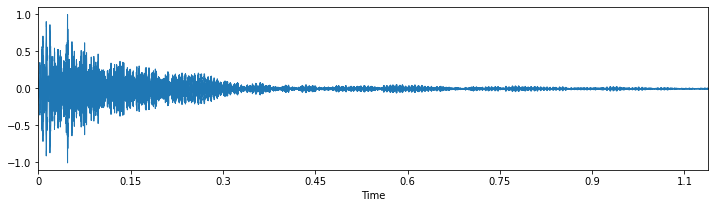

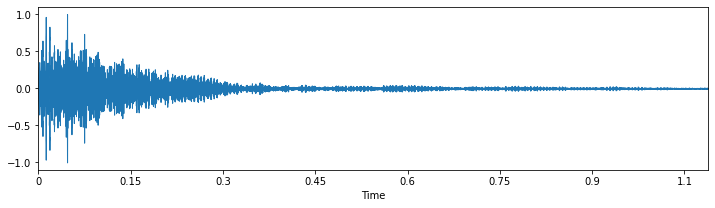

In [4]:
POS = 200
myfunc.show_audio_clip(l_clips, POS)
myfunc.show_audio_clip(r_clips, POS)

## 各クリップをTFRecord形式で保存

In [5]:
def _float_feature(value):
    return tf.train.Feature(float_list=tf.train.FloatList(value=[value]))


def _floats_feature(values):
    return tf.train.Feature(float_list=tf.train.FloatList(value=values))


def _int64_feature(value):
    return tf.train.Feature(int64_list=tf.train.Int64List(value=[value]))


def make_example(audio: np.ndarray, label: int):
    """Exampleデータの作成"""
    return tf.train.Example(
        features=tf.train.Features(
            feature={
                "audio": _floats_feature(audio),
                "label": _int64_feature(label),
            }
        )
    )


def write_tfrecord(clips, label, filename: str):
    """
    TFRecord形式で保存する
    --------------------------------
    clips: クリップのリスト
    label: クリップ全てに適用するラベル
    filename: 保存するファイル名
    """
    with tf.io.TFRecordWriter(filename) as writer:
        for clip in clips:
            ex = make_example(clip, label)
            writer.write(ex.SerializeToString())
        writer.close()

In [6]:
# 左スティック=0、右スティック=1のラベルを付ける
write_tfrecord(l_clips, 0, "./data/snare_l.tfrecord")
write_tfrecord(r_clips, 1, "./data/snare_r.tfrecord")